<a href="https://colab.research.google.com/github/mumorais/ENM_UnB-Analise_Modal/blob/main/_02_Analise_Modal_1GdL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sistema Forçado 1GdL com Amortecimento Viscoso
Dado um sistema forçado 1GdL amortecido viscoso descrito por:
$$m \ddot{u}(t) + c \dot{u}(t) + k u(t) = \sin (\Omega t)$$
onde a massa $m = 10 kg$, o amortecimento $c = 20Nm/s$ e rigidez $k = 1kN/m$. 

Responda as questões abaixo:

OBS: A entrega pode ser redigida no presente arquivo notebook Colab (.ipynb) ou Matlab/Octave.

###Questão 1: Parâmetros Modais do 1GdL Amortecido Viscoso
A frequências natural $\omega_n$ e a razão de amortecimento $\xi$ do sistema 1GdL.

In [ ]:
import numpy as np

m = 10
c = 20
k = 1000
#
wn =np.sqrt(k/m)
print("freq.natural wn:",wn)
cc = 2*m*wn
xi = c/cc
print("razão de amortecimento xi:",xi)
c = 2*xi*np.sqrt(k*m)
print("coeficiente de amortecimento c:",c)

freq.natural wn: 10.0
razão de amortecimento xi: 0.1
coeficiente de amortecimento c: 20.0


###Questão 2: Gráfico de Bode
 Plote a Receptância do 1GdL Amortecido Viscoso em coordenadas polares (Amplitude-Fase).



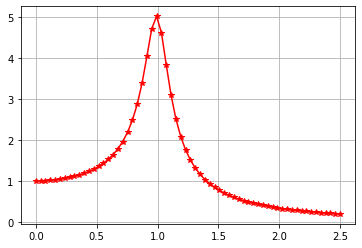

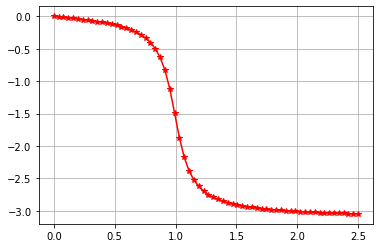

In [ ]:
import matplotlib.pyplot as plt

omg = np.linspace(0,25,64)
r = omg/wn 
u = 1/((1-r**2)+ (1j*2*xi*r))

plt.plot(r,np.abs(u),'-r*')
plt.grid()
plt.show()



plt.plot(r,np.angle(u),'-r*')
plt.grid()
plt.show()



###Questão 3: Gráfico de Nyquist
 Plote o gráfico de Nyquist da Receptância do 1GdL Amortecido Viscoso.



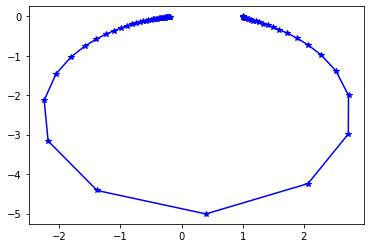

In [ ]:

plt.plot(np.real(u),np.imag(u),'-b*')
plt.show()


### Sistema Forçado 1GdL com Amortecimento Histerético
Seja o mesmo sistema forçado 1GdL anterior, agora, com amortecido histerético descrito pela expressão:
$$m \ddot{u}(t) + \frac{kh}{\Omega} \dot{u}(t) + k u(t) = \sin (\Omega t)$$
ou ainda,
$$m \ddot{u}(t) + k \left( 1 + \jmath h \right) u(t) = \sin (\Omega t)$$
onde $h$ é o fator de perda. 

Responda as questões abaixo:

###Questão 4: Parâmetros Modais do 1GdL Amortecido Histerético
Determine o fator de perda equivalente $h_{eq}$ ao amortecimento viscoso do sistema 1GdL anterior. E determine frequências histerética $\omega_h$ e o coeficiente de amortecimento histerético $c_h$ a partir da razão entre rigidez complexa $k^*$ e a massa $m$.

In [ ]:
heq = c*wn/k
print("Fator de perda equivalente h_eq:",heq)
wnh = np.sqrt(k*(1-1j*heq)/m)
print("Frequencia complexa omg_h:",np.real(wnh))
print("Coeficiente de amortecimento complexo c_h:",np.imag(wnh))


Fator de perda equivalente h_eq: 0.2
Frequencia complexa omg_h: 10.049387799061584
Coeficiente de amortecimento complexo c_h: -0.9950854917683447


###Questão 5: Comparar Receptância Viscosa e Histerética
Compare a Receptância dos sistemas forçado 1GdL com amortecimento histerético $\alpha_h (\jmath \Omega)$ e com amortecimento viscoso $\alpha_v (\jmath \Omega)$. Para isso, apresente o grafico de Bode e o gráfico de Nyquist.


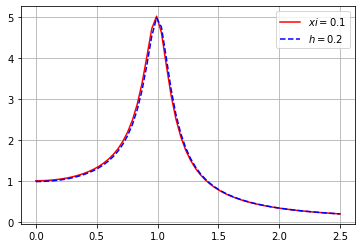

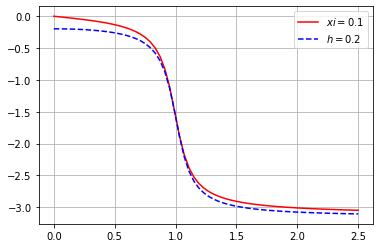

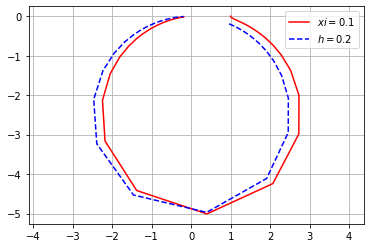

In [ ]:
#omg = np.linspace(0,25,80)
r = omg/wn 
u_h = 1/((1-r**2)+ (1j*heq))

plt.plot(r,np.abs(u),'-r', label='$xi = 0.1$')
plt.plot(r,np.abs(u_h),'--b', label='$h = 0.2$')
plt.legend(fancybox=True)
plt.grid()
plt.show()

plt.plot(r,np.angle(u  ),'-r' , label='$xi = 0.1$')
plt.plot(r,np.angle(u_h),'--b', label='$h = 0.2$')
plt.legend()
plt.grid()
plt.show()

plt.plot(np.real(u  ),np.imag(u  ),'-r' , label='$xi = 0.1$')
plt.plot(np.real(u_h),np.imag(u_h),'--b', label='$h = 0.2$')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()


###Questão 6: Co Receptância Viscosa e Histerética
Compare a Receptância dos sistemas forçado 1GdL com amortecimento histerético $\alpha_h (\jmath \Omega)$ e com amortecimento viscoso $\alpha_v (\jmath \Omega)$.


In [ ]:
# x and y given as array_like objects
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=r, y=np.abs(u),
                    mode='lines+markers',
                    name='xi=0.1'))
#fig.add_trace(go.Scatter(x=r, y=np.abs(u_h),
#                    mode='lines+markers',
#                    name='h = 0.2'))
fig.show()

#fig = px.scatter(x=r,y=np.angle(u  ))
#fig.show()

In [ ]:
!pip install circle-fit

In [ ]:
import circle_fit as cf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles


In [ ]:
Re = np.real(u)
Im = np.imag(u)

coords = [[Re[i], Im[i] ] for i in range(len(Re))]
coords[0]

[1.0, 0.0]

Centro : (0.2742452260382586, -2.483499161092479)
Raio r : 2.526723459003288
Residuo Quadrado s : 1.3546815229040836
max Re:  2.732081800515537
min Re:  -2.246715328467153
max Im:  0.0
min Im:  -5.008201391197097

Razão de Amortecimento xi : 0.09894236708381893
0.9523809523809523
0.9920634920634921
1.0317460317460316
Frequencia Natural w_{n,est  } : 0.9920634920634921
Frequencia Natural w_{n,est_2} : 0.9920634920634921


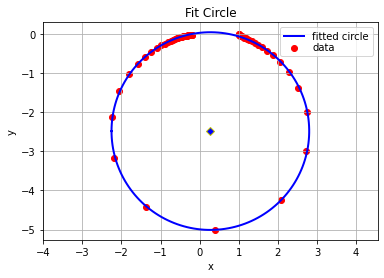

In [ ]:
xc,yc,ray,s = cf.hyper_fit(coords)

cf.plot_data_circle(Re,Im,xc,yc,ray)

print("Centro :", (xc,yc) )
print("Raio r :", ray)
print("Residuo Quadrado s :", s)
print("max Re: ",max(Re))
print("min Re: ",min(Re))
print("max Im: ",max(Im))
print("min Im: ",min(Im))
print()

xi = 1/(ray*4)
print("Razão de Amortecimento xi :",xi)

index_of_minimum = np.where(Im == min(Im))
r_medio = (r[index_of_minimum[0][0]-1] + r[index_of_minimum[0][0]] + r[index_of_minimum[0][0]+1])/3

print(r[index_of_minimum[0][0]-1])
print(r[index_of_minimum[0][0]])
print(r[index_of_minimum[0][0]+1])
print("Frequencia Natural w_{n,est  } :",r[index_of_minimum[0][0]])
print("Frequencia Natural w_{n,est_2} :",r_medio)

Centro : (0.274051706628247, -2.4835803530288065)
Raio r : 2.5267043924991492
Residuo Quadrado s : 0.023491953697159923
max Re:  2.732081800515537
min Re:  -2.246715328467153
max Im:  0.0
min Im:  -5.008201391197097

Razão de Amortecimento xi : 0.09894311370263871
0.9523809523809523
0.9920634920634921
1.0317460317460316
Frequencia Natural w_{n,est  } : 0.9920634920634921
Frequencia Natural w_{n,est_2} : 0.9920634920634921


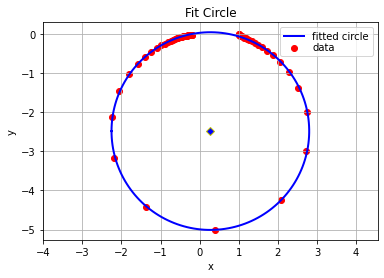

In [ ]:
xc, yc, ray, s = cf.least_squares_circle(coords)

cf.plot_data_circle(Re,Im,xc,yc,ray)

print("Centro :", (xc,yc) )
print("Raio r :", ray)
print("Residuo Quadrado s :", s)
print("max Re: ",max(Re))
print("min Re: ",min(Re))
print("max Im: ",max(Im))
print("min Im: ",min(Im))
print()

xi = 1/(ray*4)
print("Razão de Amortecimento xi :",xi)

index_of_minimum = np.where(Im == min(Im))
r_medio = (r[index_of_minimum[0][0]-1] + r[index_of_minimum[0][0]] + r[index_of_minimum[0][0]+1])/3

print(r[index_of_minimum[0][0]-1])
print(r[index_of_minimum[0][0]])
print(r[index_of_minimum[0][0]+1])
print("Frequencia Natural w_{n,est  } :",r[index_of_minimum[0][0]])
print("Frequencia Natural w_{n,est_2} :",r_medio)